In [2]:
import pandas as pd
import numpy as np
import networkx
import networkx as nx

In [3]:
path = "../original_data/CAVIAR/"
phases_index = {}
for i in range(1,12):
    phases_index[i] = pd.read_csv(path+f"phase{i}.csv", index_col=0)
    phases_index[i] = phases_index[i].rename(index = str, columns = str)

In [4]:
phases_index[1]

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
graphs = {}
graphs_pandas = {}
for i in range(1,12):
    graphs_pandas[i] = nx.from_pandas_adjacency(phases_index[i], create_using=networkx.Graph)

In [6]:
for i in range(1,12):
    print(f'# of nodes in phase {i:02}: {len(graphs_pandas[i].nodes)}, # of edges in phase {i:02}: {len(graphs_pandas[i].edges)}')

# of nodes in phase 01: 15, # of edges in phase 01: 18
# of nodes in phase 02: 24, # of edges in phase 02: 28
# of nodes in phase 03: 33, # of edges in phase 03: 56
# of nodes in phase 04: 33, # of edges in phase 04: 48
# of nodes in phase 05: 32, # of edges in phase 05: 39
# of nodes in phase 06: 27, # of edges in phase 06: 47
# of nodes in phase 07: 36, # of edges in phase 07: 49
# of nodes in phase 08: 42, # of edges in phase 08: 58
# of nodes in phase 09: 34, # of edges in phase 09: 44
# of nodes in phase 10: 42, # of edges in phase 10: 50
# of nodes in phase 11: 41, # of edges in phase 11: 50


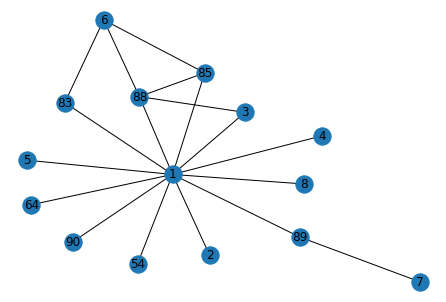

In [7]:
i = 1
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

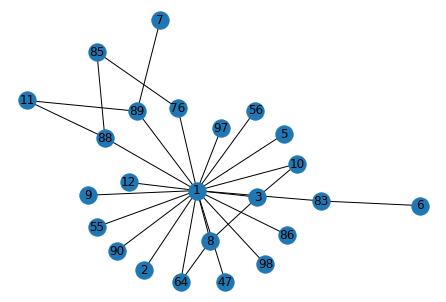

In [8]:
i = 2
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

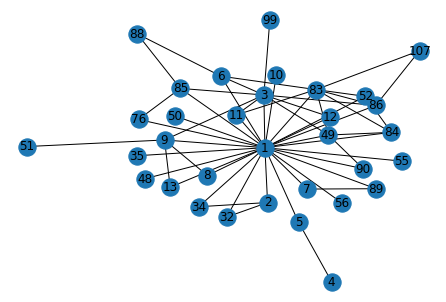

In [9]:
i = 3
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

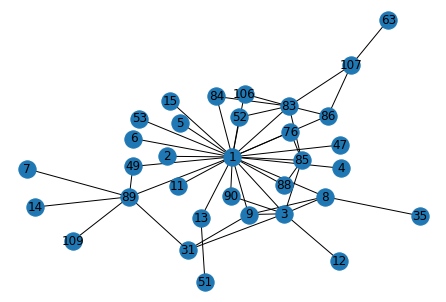

In [10]:
i = 4
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

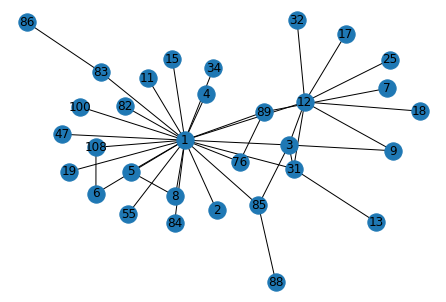

In [11]:
i = 5
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

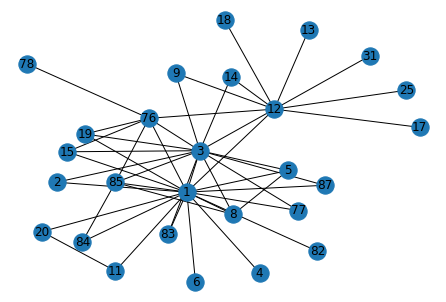

In [12]:
i = 6
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

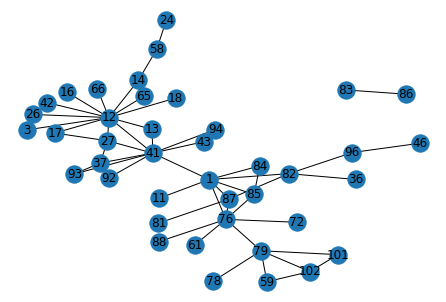

In [13]:
i = 11
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

In [14]:
nx.degree_centrality(graphs_pandas[9])['83']

0.030303030303030304

In [15]:
centrality = nx.betweenness_centrality(graphs_pandas[9], normalized = True)
suspects_list = ['1','3','12','83']
for suspect in suspects_list:
    print(f"Suspect n{suspect}'s betweenness centrality = {centrality[suspect]}'")

Suspect n1's betweenness centrality = 0.2490530303030303'
Suspect n3's betweenness centrality = 0.5762310606060607'
Suspect n12's betweenness centrality = 0.3573232323232323'
Suspect n83's betweenness centrality = 0.0'


In [16]:
centrality = nx.eigenvector_centrality(graphs_pandas[9])
suspects_list = ['1','3','12','83']
for suspect in suspects_list:
    print(f"Suspect n{suspect}'s eigenvector centrality = {centrality[suspect]}'")


Suspect n1's eigenvector centrality = 0.4589575176167988'
Suspect n3's eigenvector centrality = 0.46798771473230655'
Suspect n12's eigenvector centrality = 0.14065936326685183'
Suspect n83's eigenvector centrality = 0.09178102356758049'


In [17]:
nodes_list = []
for i in range(11):
    for node in graphs_pandas[i+1].nodes:
        if node not in nodes_list:
            nodes_list.append(node)
print(len(nodes_list))
centrality_suspect_dict = {}
for suspect in nodes_list:
    centrality_suspect_dict[suspect] = {}

107


In [18]:
betweenness_centrality = {}
for i in range(1,12):
    betweenness_centrality[i] = nx.betweenness_centrality(graphs_pandas[i], normalized = True)
    for index in betweenness_centrality[i]:
        centrality_suspect_dict[index][i] = betweenness_centrality[i][index]
betweenness_mean = {}
for suspect in nodes_list:
    betweenness_mean[suspect] = sum(centrality_suspect_dict[suspect].values())/11
print(sorted(betweenness_mean.items(), key= lambda x:-x[1]))


[('1', 0.655050992293228), ('12', 0.16756212382251084), ('3', 0.12940285961873224), ('76', 0.08379132554240724), ('87', 0.06132692752337006), ('41', 0.05036907536907536), ('89', 0.04794845425622871), ('14', 0.03267098754903633), ('83', 0.031784565037010895), ('82', 0.029196391038131618), ('85', 0.023733070994913123), ('79', 0.02194055944055944), ('37', 0.015950783633710462), ('88', 0.012435413517588706), ('8', 0.009169798115377987), ('7', 0.007977502295684115), ('96', 0.007856316663134844), ('9', 0.007481933389191453), ('86', 0.007043977200350133), ('22', 0.006984478935698448), ('31', 0.006964809384164223), ('5', 0.005681818181818182), ('107', 0.005681818181818182), ('13', 0.005681818181818182), ('2', 0.005117510669241589), ('11', 0.005106777700095339), ('58', 0.004312354312354313), ('6', 0.00402930402930403), ('71', 0.0032150776053215075), ('78', 0.0023530762167125806), ('27', 0.0021756021756021756), ('30', 0.0018078512396694215), ('19', 0.0010185892538833714), ('49', 0.00068426197458

In [19]:
eigenvector_centrality = {}
for i in range(1,12):
    eigenvector_centrality[i] = nx.eigenvector_centrality(graphs_pandas[i])
    for index in eigenvector_centrality[i]:
        centrality_suspect_dict[index][i] = eigenvector_centrality[i][index]
eigenvector_mean = {}
for suspect in nodes_list:
    eigenvector_mean[suspect] = sum(centrality_suspect_dict[suspect].values())/11
print(sorted(eigenvector_mean.items(), key= lambda x:-x[1])[0:3])

[('1', 0.5463910796025788), ('3', 0.2980946631382842), ('85', 0.1906118157991998)]


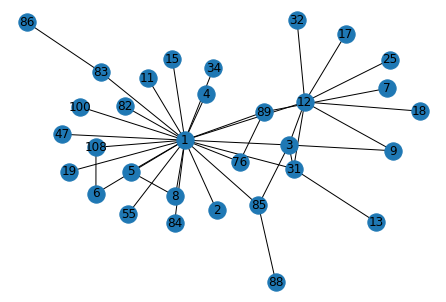

In [20]:
i = 5
nx.draw(graphs_pandas[i], pos=nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i]), with_labels=True)

In [21]:
players = {}
for i in range(1,12):
    players[i] = phases_index[i].index.values
print(players[4])
out_nodes = []
new_nodes = []
for node in players[4]:
    if node not in players[5]:
        out_nodes.append(node)
for node in players[5]:
    if node not in players[4]:
        new_nodes.append(node)
print(f'Nodes disappear in phase 5:\n{out_nodes}')
print(f'New nodes in phase 5:\n{new_nodes}')

['1' '4' '89' '83' '3' '5' '88' '85' '90' '86' '2' '7' '6' '8' '47' '76'
 '9' '35' '11' '53' '84' '49' '107' '13' '51' '63' '109' '31' '12' '14'
 '52' '106' '15']
Nodes disappear in phase 5:
['90', '35', '53', '49', '107', '51', '63', '109', '14', '52', '106']
New nodes in phase 5:
['55', '34', '32', '108', '100', '18', '17', '25', '82', '19']


In [22]:
bc_4_dic = nx.betweenness_centrality(graphs_pandas[4])
bc_5_dic = nx.betweenness_centrality(graphs_pandas[5])
ec_4_dic = nx.eigenvector_centrality(graphs_pandas[4])
ec_5_dic = nx.eigenvector_centrality(graphs_pandas[5])

In [23]:
bc_4_list = sorted(bc_4_dic.items(), key = lambda x: x[1], reverse= True)
bc_5_list = sorted(bc_5_dic.items(), key = lambda x: x[1], reverse= True)
ec_4_list = sorted(ec_4_dic.items(), key = lambda x: x[1], reverse= True)
ec_5_list = sorted(ec_5_dic.items(), key = lambda x: x[1], reverse= True)

In [24]:
bc_4_df = pd.DataFrame(bc_4_list).set_index(0)
bc_5_df = pd.DataFrame(bc_5_list).set_index(0)
bc_delta = (bc_5_df - bc_4_df).sort_values(1,ascending= False)
bc_df = bc_delta.copy()
bc_df['Phase_4'] = bc_4_df
bc_df['Phase_5'] = bc_5_df
bc_df['Rank_4'] = bc_df['Phase_4'].rank(ascending = False)
bc_df['Rank_5'] = bc_df['Phase_5'].rank(ascending = False)
bc_df = bc_df.sort_values('Phase_4',ascending = False).rename(columns = {1:'Difference'})
bc_df.to_csv('Phase_5_bc_difference.csv')
print(bc_df)

     Difference   Phase_4   Phase_5  Rank_4  Rank_5
0                                                  
1      0.044561  0.839310  0.883871     1.0     1.0
89    -0.131696  0.196213  0.064516     2.0     4.5
3     -0.046352  0.090438  0.044086     3.0     7.0
83    -0.015073  0.079589  0.064516     4.0     4.5
13    -0.062500  0.062500  0.000000     6.0    20.0
107         NaN  0.062500       NaN     6.0     NaN
8     -0.062500  0.062500  0.000000     6.0    20.0
86    -0.047427  0.047427  0.000000     8.0    20.0
85     0.047979  0.016537  0.064516     9.0     4.5
9     -0.014761  0.014761  0.000000    10.0    20.0
31     0.052419  0.012097  0.064516    11.0     4.5
51          NaN  0.000000       NaN    22.5     NaN
49          NaN  0.000000       NaN    22.5     NaN
35          NaN  0.000000       NaN    22.5     NaN
52          NaN  0.000000       NaN    22.5     NaN
109         NaN  0.000000       NaN    22.5     NaN
53          NaN  0.000000       NaN    22.5     NaN
106         

In [25]:
ec_4_df = pd.DataFrame(ec_4_list).set_index(0)
ec_5_df = pd.DataFrame(ec_5_list).set_index(0)
ec_delta = (ec_5_df - ec_4_df).sort_values(1,ascending= False)
ec_df = ec_delta.copy()
ec_df['Phase_4'] = ec_4_df
ec_df['Phase_5'] = ec_5_df
ec_df['Rank_4'] = ec_df['Phase_4'].rank(ascending = False)
ec_df['Rank_5'] = ec_df['Phase_5'].rank(ascending = False)
ec_df = ec_df.sort_values('Phase_4',ascending = False).rename(columns = {1:'Difference'})
ec_df.to_csv('Phase_5_ec_difference.csv')
print(ec_df)


     Difference   Phase_4   Phase_5  Rank_4  Rank_5
0                                                  
1      0.029820  0.610379  0.640199     1.0     1.0
3      0.003045  0.272630  0.275675     2.0     3.0
83    -0.144310  0.271015  0.126704     3.0    12.0
85    -0.070396  0.251661  0.181265     4.0     5.0
9     -0.099747  0.205910  0.106162     5.0    24.0
8     -0.043609  0.194477  0.150869     6.0     9.5
86    -0.142053  0.166217  0.024165     7.0    32.0
89    -0.006071  0.162857  0.156787     8.0     6.0
90          NaN  0.152970       NaN     9.0     NaN
52          NaN  0.152690       NaN    11.0     NaN
106         NaN  0.152690       NaN    11.0     NaN
84    -0.030594  0.152690  0.122096    11.0    18.0
88    -0.114767  0.149337  0.034570    13.5    30.0
76     0.002661  0.149337  0.151997    13.5     7.0
49          NaN  0.133953       NaN    15.0     NaN
31     0.125759  0.111114  0.236874    16.0     4.0
13    -0.063836  0.109011  0.045176    17.0    29.0
47     0.016

In [26]:
print(len(graphs_pandas[4].edges))
print(len(graphs_pandas[5].edges))

48
39


In [27]:
bc_4_df.index.difference(bc_5_df.index)

Index(['106', '107', '109', '14', '35', '49', '51', '52', '53', '63', '90'], dtype='object', name=0)

In [28]:
print(len(bc_4_df.index))
print(len(bc_5_df.index))

33
32


In [29]:
print(nx.diameter(graphs_pandas[4]))
print(nx.diameter(graphs_pandas[5]))

5
4


In [30]:
info = {}
for i in range(1,6):
    phase = i
    info[phase] = {}
    info[i]['Network diameter'] = nx.diameter(graphs_pandas[phase])
    info[i]['Avg degree'] = np.array([d for n,d in graphs_pandas[phase].degree()]).mean()
    info[phase]['Avg path lenth'] = nx.average_shortest_path_length(graphs_pandas[phase])
    info[phase]['Edge density'] = nx.density(graphs_pandas[phase])
    info[phase]['Transitivity'] = nx.transitivity(graphs_pandas[phase])
    info[phase]['Homophily'] = nx.degree_assortativity_coefficient(graphs_pandas[phase])
print(info[4])
print(info[5])
info_df = pd.DataFrame(info).transpose()
info_df = info_df.rename(index={1:'Phase 1',2:'Phase 2',3:'Phase 3',4:'Phase 4',5:'Phase 5'})
info_df.to_csv('Network_info.csv')
print(info_df)

{'Network diameter': 5, 'Avg degree': 2.909090909090909, 'Avg path lenth': 2.393939393939394, 'Edge density': 0.09090909090909091, 'Transitivity': 0.13753581661891118, 'Homophily': -0.4446941714519852}
{'Network diameter': 4, 'Avg degree': 2.4375, 'Avg path lenth': 2.3649193548387095, 'Edge density': 0.07862903225806452, 'Transitivity': 0.09375, 'Homophily': -0.5133969818293806}
         Network diameter  Avg degree  Avg path lenth  Edge density  \
Phase 1               4.0    2.400000        2.028571      0.171429   
Phase 2               4.0    2.333333        2.181159      0.101449   
Phase 3               4.0    3.393939        2.130682      0.106061   
Phase 4               5.0    2.909091        2.393939      0.090909   
Phase 5               4.0    2.437500        2.364919      0.078629   

         Transitivity  Homophily  
Phase 1      0.111111  -0.647655  
Phase 2      0.047619  -0.570201  
Phase 3      0.156250  -0.432443  
Phase 4      0.137536  -0.444694  
Phase 5      0.0

[Text(23.4, 0, '23'),
 Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1')]

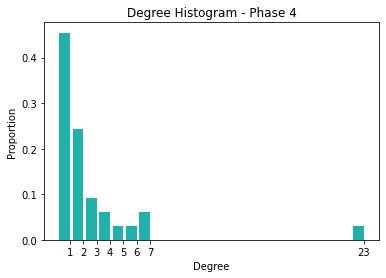

In [31]:
import collections
import matplotlib.pyplot as plt

G = graphs_pandas[4]

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
n = G.number_of_nodes()
p = [c/n for c in cnt]

fig, ax = plt.subplots()
plt.bar(deg, p, width=0.80, color="lightseagreen")

plt.title("Degree Histogram - Phase 4")
plt.ylabel("Proportion")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

[Text(22.4, 0, '22'),
 Text(8.4, 0, '8'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1')]

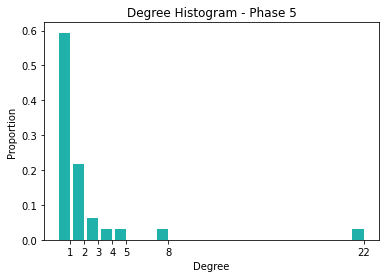

In [32]:
G = graphs_pandas[5]

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
n = G.number_of_nodes()
p = [c/n for c in cnt]

fig, ax = plt.subplots()
plt.bar(deg, p, width=0.80, color="lightseagreen")

plt.title("Degree Histogram - Phase 5")
plt.ylabel("Proportion")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])

ax.set_xticklabels(deg)

In [58]:
bc_df = pd.DataFrame()
centrality_dict = nx.betweenness_centrality(graphs_pandas[1])
bc_df["ID"] = centrality_dict.keys()
bc_df["Phase1"] = centrality_dict.values()
for i in range(2,12):
    next_df = pd.DataFrame()
    centrality_dict = nx.betweenness_centrality(graphs_pandas[i])
    next_df["ID"] = centrality_dict.keys()
    next_df[f"Phase{i}"] = centrality_dict.values()
    bc_df = pd.merge(bc_df, next_df, how = 'outer')
bc_df = bc_df.set_index('ID').fillna(0)
print(bc_df)

      Phase1    Phase2    Phase3    Phase4    Phase5    Phase6    Phase7  \
ID                                                                         
1   0.906593  0.942688  0.829503  0.839310  0.883871  0.542564  0.589356   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
89  0.142857  0.123847  0.000000  0.196213  0.064516  0.000000  0.000000   
83  0.036630  0.086957  0.046573  0.079589  0.064516  0.000000  0.000000   
3   0.000000  0.001976  0.095497  0.090438  0.044086  0.227179  0.073389   
..       ...       ...       ...       ...       ...       ...       ...   
72  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
94  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
92  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
66  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      Phase

In [76]:
bc_avg = bc_df.mean(axis = 1)
bc_avg = bc_avg.sort_values(ascending=False)
core_member = [1,3,83,86,85,6,11,88,106,89,84,5,8,76,77,87,82,96,12,17,80,33,16]
core_member = [str(i) for i in core_member]
bc_40_index = bc_avg.head(40).index.values
bc_miss_list = []
for index in bc_40_index:
    if index not in core_member:
        bc_miss_list.append(index)
        print(f"Node {index} is not in the core members list")
print(bc_miss_list)
print(bc_avg[bc_miss_list])
bc_avg.head(40).to_csv('BC_average.csv')
bc_avg[miss_list].to_csv('BC_miss_list.csv')

Node 41 is not in the core members list
Node 14 is not in the core members list
Node 79 is not in the core members list
Node 37 is not in the core members list
Node 7 is not in the core members list
Node 9 is not in the core members list
Node 22 is not in the core members list
Node 31 is not in the core members list
Node 13 is not in the core members list
Node 107 is not in the core members list
Node 2 is not in the core members list
Node 58 is not in the core members list
Node 71 is not in the core members list
Node 78 is not in the core members list
Node 27 is not in the core members list
Node 30 is not in the core members list
Node 19 is not in the core members list
Node 49 is not in the core members list
Node 20 is not in the core members list
Node 73 is not in the core members list
Node 24 is not in the core members list
Node 102 is not in the core members list
Node 90 is not in the core members list
['41', '14', '79', '37', '7', '9', '22', '31', '13', '107', '2', '58', '71', '78'

In [72]:
bc_avg[core_member].to_csv('core23_BC.csv')

In [62]:
ec_df = pd.DataFrame()
centrality_dict = nx.eigenvector_centrality(graphs_pandas[1])
ec_df["ID"] = centrality_dict.keys()
ec_df["Phase1"] = centrality_dict.values()
for i in range(2,12):
    next_df = pd.DataFrame()
    centrality_dict = nx.eigenvector_centrality(graphs_pandas[i])
    next_df["ID"] = centrality_dict.keys()
    next_df[f"Phase{i}"] = centrality_dict.values()
    ec_df = pd.merge(ec_df, next_df, how = 'outer')
ec_df = ec_df.set_index('ID').fillna(0)
print(ec_df)

      Phase1    Phase2    Phase3    Phase4    Phase5    Phase6    Phase7  \
ID                                                                         
1   0.626451  0.673912  0.593879  0.610379  0.640199  0.496656  0.601987   
4   0.160482  0.000000  0.014355  0.105740  0.122096  0.077633  0.102625   
89  0.171753  0.169109  0.107798  0.162857  0.156787  0.000000  0.000000   
83  0.219310  0.152263  0.277497  0.271015  0.126704  0.148738  0.200262   
3   0.253842  0.239088  0.291305  0.272630  0.275675  0.454884  0.372468   
..       ...       ...       ...       ...       ...       ...       ...   
72  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
94  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
92  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
66  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      Phase

In [74]:
ec_avg = ec_df.mean(axis = 1).sort_values(ascending=False)
ec_40_index = ec_avg.head(40).index.values
ec_miss_list = []
for index in ec_40_index:
    if index not in core_member:
        ec_miss_list.append(index)
        print(f"Node {index} is not in the core members list")
print(ec_miss_list)
print(ec_avg[ec_miss_list])
ec_avg.head(40).to_csv('EC_average.csv')
ec_avg[ec_miss_list].to_csv('EC_miss_list.csv')

Node 2 is not in the core members list
Node 9 is not in the core members list
Node 37 is not in the core members list
Node 4 is not in the core members list
Node 41 is not in the core members list
Node 19 is not in the core members list
Node 90 is not in the core members list
Node 13 is not in the core members list
Node 81 is not in the core members list
Node 14 is not in the core members list
Node 15 is not in the core members list
Node 55 is not in the core members list
Node 34 is not in the core members list
Node 27 is not in the core members list
Node 31 is not in the core members list
Node 47 is not in the core members list
Node 49 is not in the core members list
Node 64 is not in the core members list
Node 7 is not in the core members list
Node 20 is not in the core members list
Node 52 is not in the core members list
['2', '9', '37', '4', '41', '19', '90', '13', '81', '14', '15', '55', '34', '27', '31', '47', '49', '64', '7', '20', '52']
ID
2     0.114302
9     0.100680
37    0.

In [75]:
ec_avg[core_member].to_csv('core23_EC.csv')

In [78]:
both_miss_list = []
for n in bc_miss_list:
    if n in ec_miss_list:
        both_miss_list.append(n)
print(both_miss_list)

['41', '14', '37', '7', '9', '31', '13', '2', '27', '19', '49', '20', '90']


In [79]:
# Hubs and authorities
directed_graph = {}
for i in range(1,12):
    directed_graph[i] = nx.from_pandas_adjacency(phases_index[i], create_using=networkx.DiGraph())

In [95]:
hubs_df = pd.DataFrame()
authorities_df = pd.DataFrame()
(hc_dict, ac_dict) = nx.hits(directed_graph[1],max_iter=1000000)
hubs_df["Index"] = hc_dict.keys()
hubs_df["Phase 1"] = hc_dict.values()
authorities_df["Index"] = ac_dict.keys()
authorities_df["Phase 1"] = ac_dict.values()
for i in range(2,12):
    next_hubs_df = pd.DataFrame()
    next_authorities_df = pd.DataFrame()
    (hc_dict, ac_dict) = nx.hits(directed_graph[i],max_iter=1000000)
    next_hubs_df["Index"] = hc_dict.keys()
    next_hubs_df[f"Phase {i}"] = hc_dict.values()
    next_authorities_df["Index"] = ac_dict.keys()
    next_authorities_df[f"Phase {i}"] = ac_dict.values()
    hubs_df = pd.merge(hubs_df, next_hubs_df, how = "outer")
    authorities_df = pd.merge(authorities_df, next_authorities_df, how = "outer")
hubs_df = hubs_df.set_index("Index").fillna(0)
authorities_df = authorities_df.set_index("Index").fillna(0)
print(hubs_df)
print(authorities_df)

        Phase 1       Phase 2   Phase 3   Phase 4       Phase 5   Phase 6  \
Index                                                                       
1      0.703062  9.729552e-01  0.793100  0.859794  9.064976e-01  0.008049   
4      0.000000  0.000000e+00  0.001432  0.000000  0.000000e+00  0.000000   
89     0.001962  1.480560e-08  0.000205  0.000173  0.000000e+00  0.000000   
83     0.018080  0.000000e+00  0.060455  0.007374  5.714029e-62  0.003074   
3      0.014360  7.635780e-03  0.046251  0.023968  1.053611e-02  0.195290   
...         ...           ...       ...       ...           ...       ...   
72     0.000000  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000   
26     0.000000  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000   
94     0.000000  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000   
92     0.000000  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000   
66     0.000000  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000   

In [97]:
hubs_df.to_csv('Hubs_centrality.csv')
authorities_df.to_csv('Authorities_centrality.csv')

In [128]:
show = ['1','3']
print(hubs_df.loc[show])
print(authorities_df.loc[show])
hubs_df.loc[show].to_csv('Hubs_centrality_1_3.csv')
authorities_df.loc[show].to_csv('Authorities_centrality_1_3.csv')
hubs_1_3_df = hubs_df.loc[show].copy()
authorities_1_3_df = authorities_df.loc[show].copy()

        Phase 1   Phase 2   Phase 3   Phase 4   Phase 5   Phase 6   Phase 7  \
Index                                                                         
1      0.703062  0.972955  0.793100  0.859794  0.906498  0.008049  0.006807   
3      0.014360  0.007636  0.046251  0.023968  0.010536  0.195290  0.343322   

        Phase 8   Phase 9      Phase 10  Phase 11  
Index                                              
1      0.825878  0.587934  1.355928e-09  0.000079  
3      0.017380  0.139465  1.171597e-11  0.037892  
        Phase 1   Phase 2   Phase 3   Phase 4   Phase 5   Phase 6   Phase 7  \
Index                                                                         
1      0.011810  0.000269  0.003153  0.002161  0.000581  0.805419  0.727422   
3      0.135714  0.336704  0.149565  0.275466  0.323586  0.032090  0.006894   

        Phase 8   Phase 9      Phase 10      Phase 11  
Index                                                  
1      0.002038  0.016157  2.970789e-10  9.824

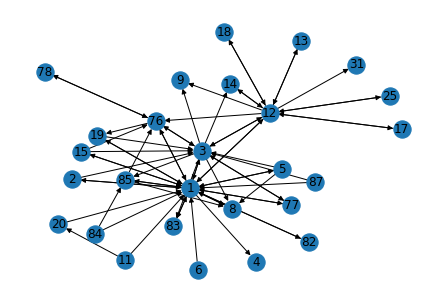

In [126]:
i = 6
pos = nx.drawing.nx_agraph.graphviz_layout(graphs_pandas[i])
nx.draw(directed_graph[i], pos=pos, with_labels=True)

In [147]:
i = 4
for (n,d) in directed_graph[i].in_degree:
    if n in show:
        print((n,d))
for (n,d) in directed_graph[i].out_degree:
    if n in show:
        print((n,d))

('1', 11)
('3', 4)
('1', 21)
('3', 6)


In [148]:
i = 5
for (n,d) in directed_graph[i].in_degree:
    if n in show:
        print((n,d))
for (n,d) in directed_graph[i].out_degree:
    if n in show:
        print((n,d))

('1', 11)
('3', 3)
('1', 18)
('3', 4)


In [149]:
i = 6
for (n,d) in directed_graph[i].in_degree:
    if n in show:
        print((n,d))
for (n,d) in directed_graph[i].out_degree:
    if n in show:
        print((n,d))

('1', 17)
('3', 9)
('1', 13)
('3', 9)


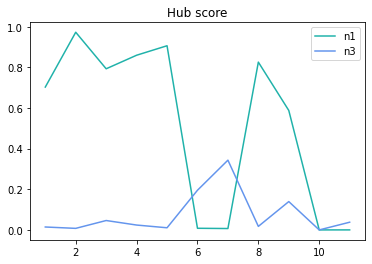

In [138]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_title(f"Hub score")
x = [i for i in range(1,12)]
ax1.plot(x, hubs_1_3_df.values[0], c = "lightseagreen", label = 'n1')
ax1.plot(x, hubs_1_3_df.values[1], c = 'cornflowerblue', label = 'n3')
ax1.legend()
plt.show()

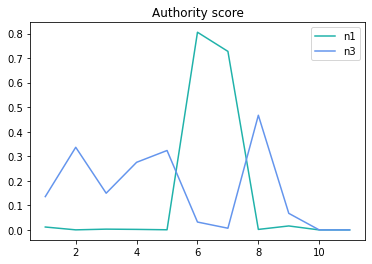

In [140]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_title(f"Authority score")
x = [i for i in range(1,12)]
ax1.plot(x, authorities_1_3_df.values[0], c = "lightseagreen", label = 'n1')
ax1.plot(x, authorities_1_3_df.values[1], c = 'cornflowerblue', label = 'n3')
ax1.legend()
plt.show()